# Cloning dataset

In [1]:
# This is our GitHub repository, all datasets are included in this repo
!git clone https://github.com/Alvin-Tan-Yi-Tung/Animal_Disease_Prediction.git

fatal: destination path 'Animal_Disease_Prediction' already exists and is not an empty directory.


# Data Preparation

In [2]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/Animal_Disease_Prediction/backend/wahis_outbreak_details.csv")
df

,country,location,lat_long,start_date,end_date,cases,deaths
0,Armenia,Sardarapat,"40.1239 , 44.0044",2025/08/04,2025/08/05,1,1
1,Armenia,Aygeshat,"40.227 , 44.2855",2025/07/29,2025/07/30,1,1
2,Namibia,Walvisbay Lagoon,"-22.96348 , 14.48727",2025/06/16,-,-,1
3,Thailand,Si Sa Ket,"14.951072 , 104.331852",2025/06/30,-,1,1
4,Thailand,Nakhon Ratchasima,"15.552079 , 102.777379",2025/06/23,-,1,1
...,...,...,...,...,...,...,...
2195,France,FONTENAY LE COMTE,"46.45964911 , -0.78859276",2007/11/23,2007/11/29,1,1
2196,Ecuador,San Juan de Bellavista,"-3.41489966 , -79.35188579",2007/03/12,2007/06/01,1,1
2197,Ecuador,Quebrada Honda,"-3.40597651 , -79.35171856",2007/02/20,2007/06/01,1,1
2198,Ecuador,San Carlos,"-0.19417301 , -76.51244951",2007/03/06,2007/08/17,1,1


In [3]:
# Before preprocessing the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     2200 non-null   object
 1   location    2200 non-null   object
 2   lat_long    2200 non-null   object
 3   start_date  2200 non-null   object
 4   end_date    2200 non-null   object
 5   cases       2200 non-null   object
 6   deaths      2200 non-null   object
dtypes: object(7)
memory usage: 120.4+ KB


# Data Preprocessing

In [4]:
from sklearn.preprocessing import LabelEncoder

# Convert dates (string dates to datetime objects & missing end dates become NaT)
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# Handle ongoing outbreaks (to indicate whether the outbreak is still active or not)
df['is_ongoing'] = df['end_date'].isna()

# Calculate the duration of on-going outbreak (output is integer days)
df['duration'] = (df['end_date'].fillna(pd.Timestamp.today()) - df['start_date']).dt.days

# Extract location features (split into two float columns)
df[['latitude', 'longitude']] = df['lat_long'].str.split(',', expand=True).astype(float)

# Convert cases and deaths to numeric
df['cases'] = pd.to_numeric(df['cases'], errors='coerce')
df['deaths'] = pd.to_numeric(df['deaths'], errors='coerce')

# Fill the "-" with 0
df['cases'] = df['cases'].fillna(0)
df['deaths'] = df['deaths'].fillna(0)

# Feature engineering
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month
df['week'] = df['start_date'].dt.isocalendar().week

# Country encoding
country_encoder = LabelEncoder()
df['country_code'] = country_encoder.fit_transform(df['country'])

print(df.head().to_string())

    country           location                lat_long start_date   end_date  cases  deaths  is_ongoing  duration   latitude   longitude  year  month  week  country_code
0   Armenia         Sardarapat       40.1239 , 44.0044 2025-08-04 2025-08-05    1.0     1.0       False         1  40.123900   44.004400  2025      8    32             2
1   Armenia           Aygeshat        40.227 , 44.2855 2025-07-29 2025-07-30    1.0     1.0       False         1  40.227000   44.285500  2025      7    31             2
2   Namibia   Walvisbay Lagoon    -22.96348 , 14.48727 2025-06-16        NaT    0.0     1.0        True        87 -22.963480   14.487270  2025      6    25            34
3  Thailand          Si Sa Ket  14.951072 , 104.331852 2025-06-30        NaT    1.0     1.0        True        73  14.951072  104.331852  2025      6    27            44
4  Thailand  Nakhon Ratchasima  15.552079 , 102.777379 2025-06-23        NaT    1.0     1.0        True        80  15.552079  102.777379  2025      6 

In [5]:
# View the data types of columns (after preprocessing)
print(df.dtypes)

country                 object
location                object
lat_long                object
start_date      datetime64[ns]
end_date        datetime64[ns]
cases                  float64
deaths                 float64
is_ongoing                bool
duration                 int64
latitude               float64
longitude              float64
year                     int32
month                    int32
week                    UInt32
country_code             int64
dtype: object


In [6]:
# View missing values for each column
print(df.isna().sum())

country           0
location          0
lat_long          0
start_date        0
end_date        336
cases             0
deaths            0
is_ongoing        0
duration          0
latitude          0
longitude         0
year              0
month             0
week              0
country_code      0
dtype: int64


In [7]:
# View the encoder of country
print(f"Encoded {len(country_encoder.classes_)} countries:")
print(country_encoder.classes_[:])

Encoded 48 countries:
['Albania' 'Argentina' 'Armenia' 'Bangladesh' 'Belgium' 'Bhutan'
 'Bosnia and Herzegovina' 'Burkina Faso' 'Cambodia' 'Canada' 'Ceuta'
 'Chile' 'Chinese Taipei' 'Congo (Rep. of the)' 'Ecuador' 'Egypt'
 'El Salvador' 'Finland' 'France' 'French Guiana' 'Germany' 'Greece'
 'Honduras' 'Hungary' 'Indonesia' 'Italy' 'Kazakhstan' 'Liberia' 'Libya'
 'Lithuania' 'Malaysia' 'Melilla' 'Moldova' 'Myanmar' 'Namibia'
 'Netherlands' 'Nigeria' 'North Macedonia' 'Norway' 'Palestine' 'Slovakia'
 'South Africa' 'Spain' 'Sweden' 'Thailand' 'Timor-Leste'
 'United States of America' 'Uruguay']


In [8]:
import pandas as pd

# Ensure start_date is datetime
df['start_date'] = pd.to_datetime(df['start_date'])

# Keep the whole dataset as train (no split into test)
df_train = df.copy().reset_index(drop=True)

# Show results
print(f"Dataset kept as training: {df_train.shape[0]} rows")
print(df_train['start_date'].min(), "to", df_train['start_date'].max())


Dataset kept as training: 2200 rows
2007-02-20 00:00:00 to 2025-08-04 00:00:00


# Data Preprocessing

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# --- Custom Layers ---
# Total have 3 Sequence Layers (Country, Outbreak, date)
@tf.keras.utils.register_keras_serializable()
class OutbreakSequence(layers.Layer):
    def call(self, inputs):
        return inputs[:, :, 0:1]

    def get_config(self):
        return {}

@tf.keras.utils.register_keras_serializable()
class CountrySequence(layers.Layer):
    def call(self, inputs):
        return tf.cast(inputs[:, :, 1], dtype='int32')

    def get_config(self):
        return {}

@tf.keras.utils.register_keras_serializable()
class DateSequence(layers.Layer):
    """Extracts time features from input tensor (3rd column)."""
    def call(self, inputs):
        return inputs[:, :, 2:]  # Year, Month, Week, Day

    def get_config(self):
        return {}

# --- LSTM Model Builder ---
def build_global_lstm(
    seq_len: int,
    n_countries: int,
    emb_dim: int = 8,
    lstm_units: tuple = (128, 64),
    dense_units: tuple = (64, 32),
    dropout_rates: tuple = (0.2, 0.3, 0.2),
    learning_rate: float = 1e-3,
    date_dim: int = 3  # Number of time features
) -> models.Model:
    """
    Build a global LSTM model with country embeddings & date features.
    """
    inputs = layers.Input(shape=(seq_len, 2 + date_dim))  # outbreak, country_id, date features

    # Extract sequences
    outbreak_seq = OutbreakSequence(name='outbreak_sequence')(inputs)
    country_seq = CountrySequence(name='country_sequence')(inputs)
    date_seq = DateSequence(name='date_sequence')(inputs)

    # Embedding for country IDs
    country_emb = layers.Embedding(
        input_dim=n_countries,
        output_dim=emb_dim,
        mask_zero=False
    )(country_seq)

    # Merge outbreak feature + country embedding + date features
    merged = layers.Concatenate(axis=-1)([outbreak_seq, country_emb, date_seq])

    # LSTM stack
    x = layers.LSTM(lstm_units[0], return_sequences=True)(merged)
    x = layers.Dropout(dropout_rates[0])(x)
    x = layers.LSTM(lstm_units[1])(x)
    x = layers.Dropout(dropout_rates[1])(x)

    # Dense layers
    for units in dense_units[:-1]:
        x = layers.Dense(units, activation="relu")(x)
        x = layers.Dropout(dropout_rates[2])(x)

    x = layers.Dense(dense_units[-1], activation="relu")(x)
    outputs = layers.Dense(1, activation="linear")(x)

    model = models.Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss="mse",
        metrics=["mae", "mse"]
    )
    return model


# --- Feature Engineering to Include Dates ---
def add_time_features(panel):
    """
    Adds normalized year, month, and week features for model input.
    """
    df = panel.copy()
    df['year'] = df['start_date'].dt.year
    df['month'] = df['start_date'].dt.month
    df['week'] = df['start_date'].dt.isocalendar().week.astype(int)

    # Normalize to [0,1]
    df['year'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())
    df['month'] = df['month'] / 12.0
    df['week'] = df['week'] / 52.0

    return df


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# --- helpers ---
def _freq_from_interval(interval: str) -> str:
    interval = interval.lower()
    if interval == "weekly":
        return "W"
    if interval == "monthly":
        return "ME"
    raise ValueError("interval must be one of: 'weekly', 'monthly'")

def build_regular_panel(
    df, interval="weekly", start_date=None, end_date=None,
    country_col="country", target_col="outbreak_count",
    countries_list=None, n_lags=0, label_encoder=None):

    df = df.copy()
    df["start_date"] = pd.to_datetime(df["start_date"])
    if target_col not in df.columns:
        df[target_col] = 1

    needed = [country_col, "start_date", target_col]
    missing = [c for c in needed if c not in df.columns]
    if missing:
        raise ValueError(f"Missing columns in df: {missing}")

    if countries_list is not None:
        df = df[df[country_col].isin(countries_list)].copy()

    global_min = df["start_date"].min() if start_date is None else pd.to_datetime(start_date)
    global_max = df["start_date"].max() if end_date is None else pd.to_datetime(end_date)

    freq = _freq_from_interval(interval)
    full_range = pd.date_range(start=global_min, end=global_max, freq=freq)

    grouped = (
        df.groupby([country_col, pd.Grouper(key="start_date", freq=freq)])[target_col]
        .sum()
        .rename(target_col)
        .to_frame()
    )

    countries = countries_list if countries_list else sorted(df[country_col].unique())
    full_index = pd.MultiIndex.from_product([countries, full_range], names=[country_col, "start_date"])
    panel = grouped.reindex(full_index, fill_value=0).reset_index()

    if label_encoder is None:
        le = LabelEncoder()
        panel["country_id"] = le.fit_transform(panel[country_col])
    else:
        le = label_encoder
        panel["country_id"] = le.transform(panel[country_col])

    if n_lags > 0:
        panel = panel.set_index([country_col, "start_date"])
        for i in range(1, n_lags+1):
            panel[f"lag_{i}"] = panel.groupby(country_col)[target_col].shift(i).fillna(0)
        panel = panel.reset_index()

    return panel, full_range, le


# --- LSTM sequence creation ---
def create_global_lstm_sequences_from_panel(
    panel, time_steps=12, target_col="outbreak_count",
    country_id_col="country_id", start_col="start_date", scaler=None):

    panel = add_time_features(panel)  # Add time features
    if scaler is None:
        scaler = MinMaxScaler()
        panel["target_scaled"] = scaler.fit_transform(panel[[target_col]])
    else:
        panel["target_scaled"] = scaler.transform(panel[[target_col]])

    X, y, end_dates = [], [], []

    for cid, grp in panel.groupby(country_id_col, sort=True):
        grp = grp.sort_values(start_col)
        cases = grp["target_scaled"].to_numpy()
        cids = grp[country_id_col].to_numpy()
        years = grp["year"].to_numpy()
        months = grp["month"].to_numpy()
        weeks = grp["week"].to_numpy()
        dates = grp[start_col].to_numpy()

        if len(cases) <= time_steps:
            continue

        for i in range(len(cases) - time_steps):
            seq_cases = cases[i:i+time_steps]
            seq_cids = cids[i:i+time_steps]
            seq_years = years[i:i+time_steps]
            seq_months = months[i:i+time_steps]
            seq_weeks = weeks[i:i+time_steps]

            seq = np.stack([seq_cases, seq_cids, seq_years, seq_months, seq_weeks], axis=-1)
            X.append(seq)
            y.append(cases[i+time_steps])
            end_dates.append(dates[i+time_steps]) # Append the date corresponding to the target

    return np.array(X, np.float32), np.array(y, np.float32), np.array(end_dates), scaler

# Split Data into Train, Test, Validation

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# ============================================================
# 1. Ensure datetime
# ============================================================
df['start_date'] = pd.to_datetime(df['start_date'])

# ============================================================
# 2. Build Panels (weekly & monthly)
# ============================================================
countries = sorted(df["country"].unique())

weekly_panel_full, _, le = build_regular_panel(
    df, interval="weekly", countries_list=countries
)
monthly_panel_full, _, _ = build_regular_panel(
    df, interval="monthly", countries_list=countries, label_encoder=le
)

# ============================================================
# 3. Create Sequences
# ============================================================
X_weekly, y_weekly, end_dates_weekly, scaler_weekly = create_global_lstm_sequences_from_panel(
    weekly_panel_full, time_steps=24
)
X_monthly, y_monthly, end_dates_monthly, scaler_monthly = create_global_lstm_sequences_from_panel(
    monthly_panel_full, time_steps=12
)

print("Weekly total sequences:", X_weekly.shape, y_weekly.shape)
print("Monthly total sequences:", X_monthly.shape, y_monthly.shape)

# ============================================================
# 4. Chronological 80/10/10 Split (sorted by date)
# ============================================================
def split_sequences_chrono(X, y, end_dates, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    # Sort by end_dates (chronological)
    sort_idx = np.argsort(end_dates)
    X, y, end_dates = X[sort_idx], y[sort_idx], end_dates[sort_idx]

    total = len(X)
    train_end = int(total * train_ratio)
    val_end = train_end + int(total * val_ratio)

    X_train, y_train, end_train = X[:train_end], y[:train_end], end_dates[:train_end]
    X_val, y_val, end_val = X[train_end:val_end], y[train_end:val_end], end_dates[train_end:val_end]
    X_test, y_test, end_test = X[val_end:], y[val_end:], end_dates[val_end:]

    return (X_train, y_train, end_train,
            X_val, y_val, end_val,
            X_test, y_test, end_test)

# --- Weekly ---
(X_weekly_train, y_weekly_train, end_dates_weekly_train,
 X_weekly_val, y_weekly_val, end_dates_weekly_val,
 X_weekly_test, y_weekly_test, end_dates_weekly_test) = split_sequences_chrono(
    X_weekly, y_weekly, end_dates_weekly
)

# --- Monthly ---
(X_monthly_train, y_monthly_train, end_dates_monthly_train,
 X_monthly_val, y_monthly_val, end_dates_monthly_val,
 X_monthly_test, y_monthly_test, end_dates_monthly_test) = split_sequences_chrono(
    X_monthly, y_monthly, end_dates_monthly
)

# ============================================================
# 5. Debug Print with Percentages and Dates
# ============================================================
def print_split_info(name, X_train, end_train, X_val, end_val, X_test, end_test):
    total = len(X_train) + len(X_val) + len(X_test)
    print(f"\n{name} sequences: total={total}")
    print(f" Train: {len(X_train)} ({len(X_train)/total:.1%}) "
          f"| Dates: {end_train.min()} → {end_train.max()}")
    print(f" Val  : {len(X_val)} ({len(X_val)/total:.1%}) "
          f"| Dates: {end_val.min()} → {end_val.max()}")
    print(f" Test : {len(X_test)} ({len(X_test)/total:.1%}) "
          f"| Dates: {end_test.min()} → {end_test.max()}")

print_split_info("Weekly",
    X_weekly_train, end_dates_weekly_train,
    X_weekly_val, end_dates_weekly_val,
    X_weekly_test, end_dates_weekly_test
)
print_split_info("Monthly",
    X_monthly_train, end_dates_monthly_train,
    X_monthly_val, end_dates_monthly_val,
    X_monthly_test, end_dates_monthly_test
)


Weekly total sequences: (45072, 24, 5) (45072,)
Monthly total sequences: (10080, 12, 5) (10080,)

Weekly sequences: total=45072
 Train: 36057 (80.0%) | Dates: 2007-08-12T00:00:00.000000000 → 2022-01-02T00:00:00.000000000
 Val  : 4507 (10.0%) | Dates: 2022-01-02T00:00:00.000000000 → 2023-10-22T00:00:00.000000000
 Test : 4508 (10.0%) | Dates: 2023-10-22T00:00:00.000000000 → 2025-08-03T00:00:00.000000000

Monthly sequences: total=10080
 Train: 8064 (80.0%) | Dates: 2008-02-29T00:00:00.000000000 → 2022-01-31T00:00:00.000000000
 Val  : 1008 (10.0%) | Dates: 2022-02-28T00:00:00.000000000 → 2023-10-31T00:00:00.000000000
 Test : 1008 (10.0%) | Dates: 2023-11-30T00:00:00.000000000 → 2025-07-31T00:00:00.000000000


# Model Building

In [12]:
# ---------------- Number of Countries ----------------
# Use the training panel (weekly or monthly full) to count unique countries
n_countries = weekly_panel_full['country_id'].nunique()

# Weekly model (seq_len = 24)
weekly_model = build_global_lstm(
    seq_len=24,
    n_countries=n_countries,
    emb_dim=8,
    lstm_units=(128, 64),
    dense_units=(64, 32),
    dropout_rates=(0.2, 0.3, 0.3),
    learning_rate=1e-3,
    date_dim=3
)

# Monthly model (seq_len = 12)
monthly_model = build_global_lstm(
    seq_len=12,
    n_countries=n_countries,
    emb_dim=8,
    lstm_units=(128, 64),
    dense_units=(64, 32),
    dropout_rates=(0.2, 0.3, 0.3),
    learning_rate=1e-3,
    date_dim=3
)

# Summaries
weekly_model.summary()
monthly_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 24, 5)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ country_sequence    │ (None, 24)        │          0 │ input_layer[0][0] │
│ (CountrySequence)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ outbreak_sequence   │ (None, 24, 1)     │          0 │ input_layer[0][0] │
│ (OutbreakSequence)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 24, 8)     │        384 │ country_sequence… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ date_sequence       │ (None, 24, 3)     │          0 │ input_layer[0][0] │
│ (DateSequence)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 24, 12)    │          0 │ outbreak_sequenc… │
│ (Concatenate)       │                   │            │ embedding[0][0],  │
│                     │                   │            │ date_sequence[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 24, 128)   │     72,192 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 24, 128)   │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 64)        │     49,408 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      4,160 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      2,080 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         33 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 128,257 (501.00 KB)

 Trainable params: 128,257 (501.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 12, 5)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ country_sequence    │ (None, 12)        │          0 │ input_layer_1[0]… │
│ (CountrySequence)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ outbreak_sequence   │ (None, 12, 1)     │          0 │ input_layer_1[0]… │
│ (OutbreakSequence)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 12, 8)     │        384 │ country_sequence… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ date_sequence       │ (None, 12, 3)     │          0 │ input_layer_1[0]… │
│ (DateSequence)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 12, 12)    │          0 │ outbreak_sequenc… │
│ (Concatenate)       │                   │            │ embedding_1[0][0… │
│                     │                   │            │ date_sequence[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 12, 128)   │     72,192 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 12, 128)   │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 64)        │     49,408 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 64)        │          0 │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      4,160 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │      2,080 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         33 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 128,257 (501.00 KB)

 Trainable params: 128,257 (501.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
print(n_countries)

48


# Model Training

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt

# ============================================================
# Callbacks
# ============================================================
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

# ============================================================
# Weekly Model Training
# ============================================================
print("\n🚀 Training Weekly Model...")
weekly_history = weekly_model.fit(
    X_weekly_train, y_weekly_train,
    validation_data=(X_weekly_val, y_weekly_val),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# ============================================================
# Monthly Model Training
# ============================================================
print("\n🚀 Training Monthly Model...")
monthly_history = monthly_model.fit(
    X_monthly_train, y_monthly_train,
    validation_data=(X_monthly_val, y_monthly_val),
    epochs=100,
    batch_size=16,   # ⚠️ changed from 1 → 16 for efficiency
    callbacks=callbacks,
    verbose=1
)



🚀 Training Weekly Model...
Epoch 1/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 2.7145e-04 - mae: 0.0050 - mse: 2.7145e-04 - val_loss: 5.4345e-05 - val_mae: 0.0011 - val_mse: 5.4345e-05 - learning_rate: 0.0010
Epoch 2/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 2.2140e-04 - mae: 0.0024 - mse: 2.2140e-04 - val_loss: 5.5865e-05 - val_mae: 0.0022 - val_mse: 5.5865e-05 - learning_rate: 0.0010
Epoch 3/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 2.2100e-04 - mae: 0.0025 - mse: 2.2100e-04 - val_loss: 5.8982e-05 - val_mae: 0.0011 - val_mse: 5.8982e-05 - learning_rate: 0.0010
Epoch 4/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 1.6575e-04 - mae: 0.0023 - mse: 1.6575e-04 - val_loss: 6.9414e-05 - val_mae: 0.0017 - val_mse: 6.9414e-05 - learning_rate: 0.0010
Epoch 5/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 1.2850e-04 - mae: 0.0020 - mse: 1.2850e-04 - val_loss: 5.3116e-05 - val_mae: 9.4733e-04 - val_mse: 5.3116e-05 - learning_rate: 0.00

# Model Evaluation

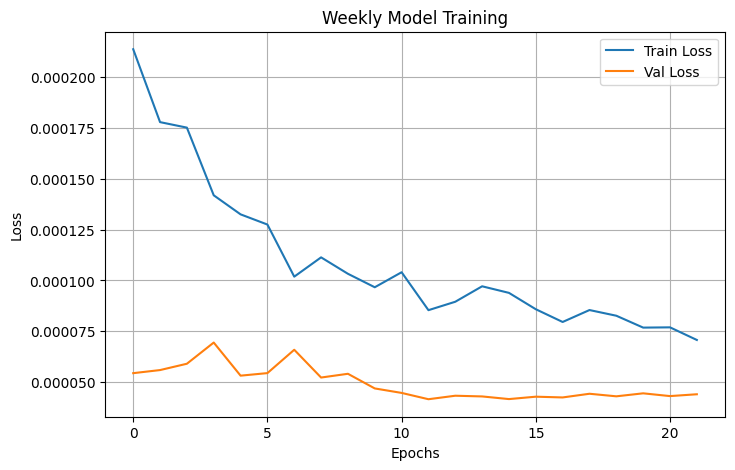

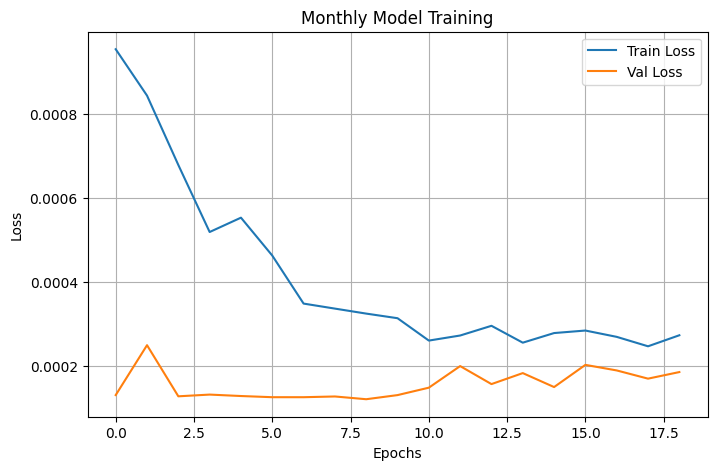

In [15]:
# ============================================================
# Plot Training Curves
# ============================================================
def plot_history(history, title):
    plt.figure(figsize=(8,5))
    plt.plot(history.history['loss'], label="Train Loss")
    plt.plot(history.history['val_loss'], label="Val Loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(weekly_history, "Weekly Model Training")
plot_history(monthly_history, "Monthly Model Training")

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# ============================================================
# Evaluation Helper Function
# ============================================================
def evaluate_model(model, X_test, y_test, y_scaler, label="Model"):
    """
    Evaluate model performance on test set with inverse transform.
    Returns MAE, MSE, RMSE.
    """
    # Predict
    y_pred = model.predict(X_test, verbose=0)

    # Inverse transform
    y_test_inv = y_scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()
    y_pred_inv = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()

    # Metrics
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    rmse = np.sqrt(mse)

    print(f"\n📊 {label} Evaluation:")
    print(f" MAE : {mae:.4f}")
    print(f" MSE : {mse:.4f}")
    print(f" RMSE: {rmse:.4f}")

    return mae, mse, rmse, y_test_inv, y_pred_inv

# ============================================================
# Weekly Model Evaluation
# ============================================================
weekly_mae, weekly_mse, weekly_rmse, y_weekly_test_inv, y_weekly_pred_inv = evaluate_model(
    weekly_model,
    X_weekly_test, y_weekly_test,
    scaler_weekly,
    label="Weekly Model"
)

# ============================================================
# Monthly Model Evaluation
# ============================================================
monthly_mae, monthly_mse, monthly_rmse, y_monthly_test_inv, y_monthly_pred_inv = evaluate_model(
    monthly_model,
    X_monthly_test, y_monthly_test,
    scaler_monthly,
    label="Monthly Model"
)



📊 Weekly Model Evaluation:
 MAE : 0.0831
 MSE : 0.2331
 RMSE: 0.4828

📊 Monthly Model Evaluation:
 MAE : 0.3009
 MSE : 3.4904
 RMSE: 1.8683


# Model Prediction

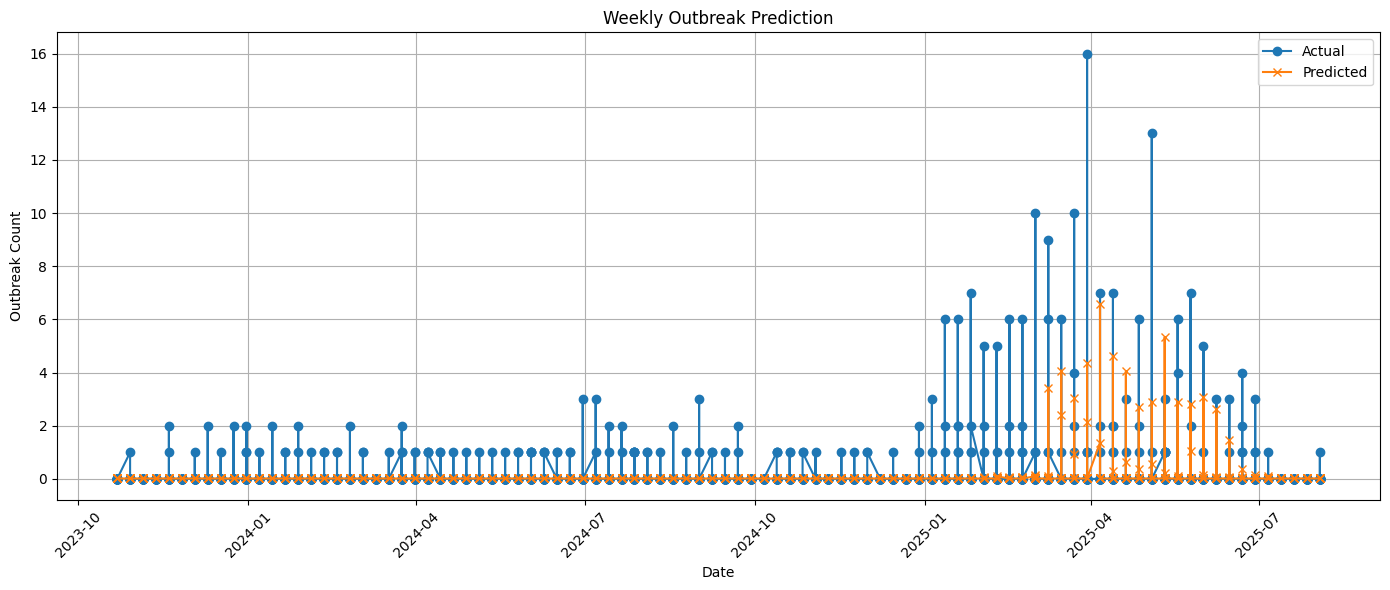

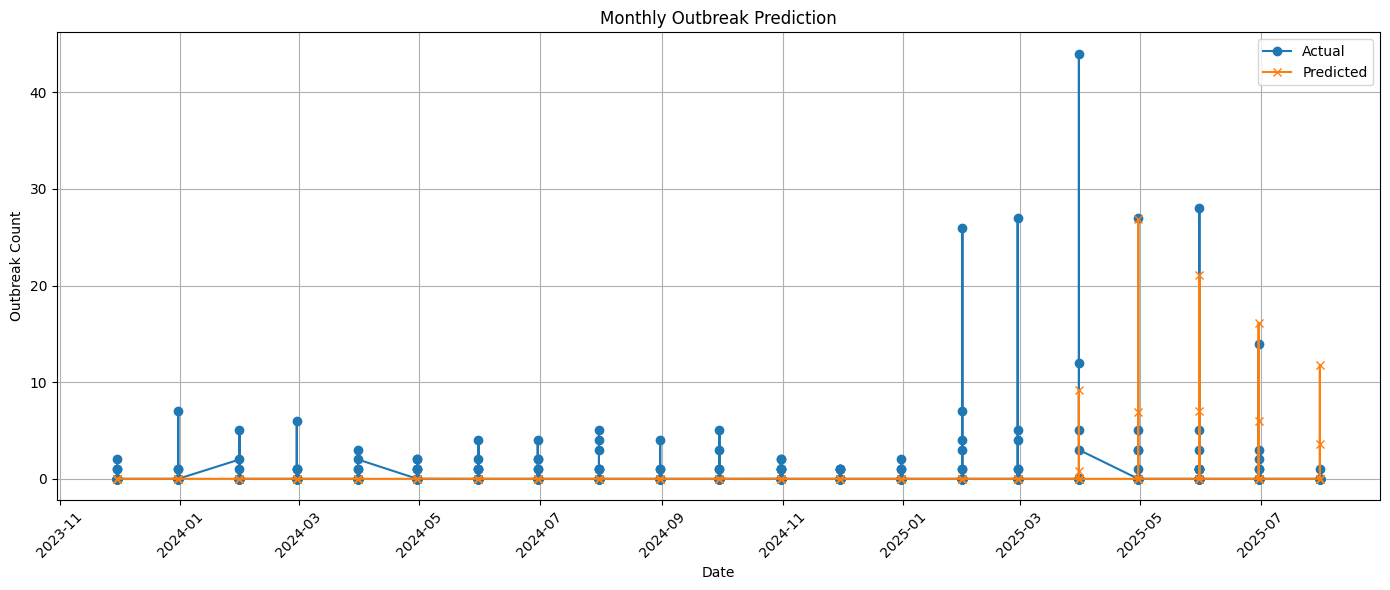

In [17]:
import matplotlib.pyplot as plt

# ============================================================
# Plot Actual vs Predicted
# ============================================================
def plot_predictions(dates, y_true, y_pred, title):
    plt.figure(figsize=(14, 6))
    plt.plot(dates, y_true, label="Actual", marker="o")
    plt.plot(dates, y_pred, label="Predicted", marker="x")

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Outbreak Count")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ============================================================
# Weekly Predictions
# ============================================================
y_weekly_pred = weekly_model.predict(X_weekly_test, verbose=0)
y_weekly_pred_inv = scaler_weekly.inverse_transform(y_weekly_pred.reshape(-1, 1)).ravel()
y_weekly_test_inv = scaler_weekly.inverse_transform(y_weekly_test.reshape(-1, 1)).ravel()

plot_predictions(
    end_dates_weekly_test,
    y_weekly_test_inv,
    y_weekly_pred_inv,
    title="Weekly Outbreak Prediction"
)

# ============================================================
# Monthly Predictions
# ============================================================
y_monthly_pred = monthly_model.predict(X_monthly_test, verbose=0)
y_monthly_pred_inv = scaler_monthly.inverse_transform(y_monthly_pred.reshape(-1, 1)).ravel()
y_monthly_test_inv = scaler_monthly.inverse_transform(y_monthly_test.reshape(-1, 1)).ravel()

plot_predictions(
    end_dates_monthly_test,
    y_monthly_test_inv,
    y_monthly_pred_inv,
    title="Monthly Outbreak Prediction"
)


# Annual prediciton

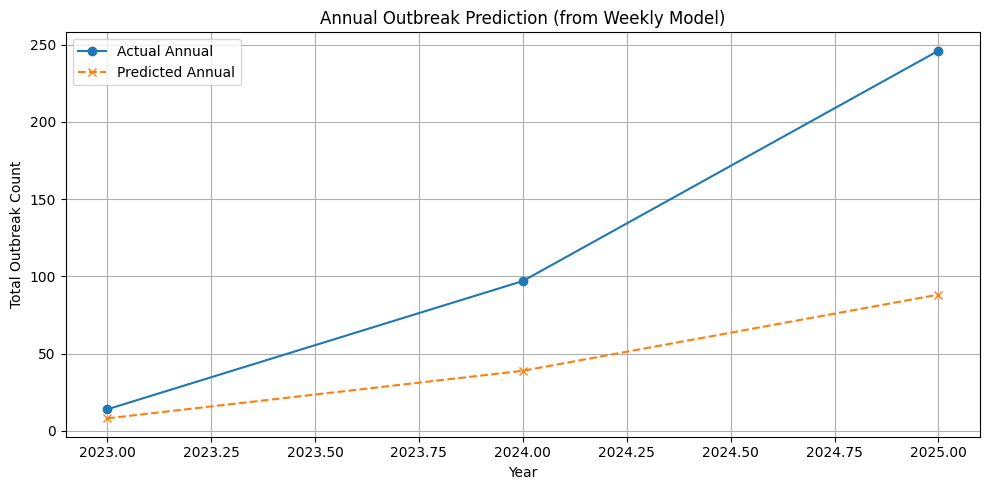


=== Annual Weekly Prediction Results ===
   year  actual  predicted
0  2023    14.0   8.176165
1  2024    97.0  38.946007
2  2025   246.0  88.229050


In [18]:
import matplotlib.pyplot as plt

def plot_annual_from_weekly(end_dates, y_true, y_pred, scaler, title="Annual Prediction from Weekly Model"):
    """
    Aggregate weekly actual & predicted outbreak counts into annual totals.
    """
    # Inverse transform
    y_true_inv = scaler.inverse_transform(y_true.reshape(-1, 1)).ravel()
    y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()

    # Build dataframe
    df = pd.DataFrame({
        "date": pd.to_datetime(end_dates),
        "actual": y_true_inv,
        "predicted": y_pred_inv
    })
    df["year"] = df["date"].dt.year

    # Aggregate by year
    df_yearly = df.groupby("year")[["actual", "predicted"]].sum().reset_index()

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(df_yearly["year"], df_yearly["actual"], marker="o", label="Actual Annual")
    plt.plot(df_yearly["year"], df_yearly["predicted"], marker="x", linestyle="--", label="Predicted Annual")
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Total Outbreak Count")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return df_yearly

# Predict weekly
y_weekly_pred = weekly_model.predict(X_weekly_test, verbose=0).flatten()

# Annual aggregation & plot
annual_weekly_results = plot_annual_from_weekly(
    end_dates=end_dates_weekly_test,
    y_true=y_weekly_test,
    y_pred=y_weekly_pred,
    scaler=scaler_weekly,
    title="Annual Outbreak Prediction (from Weekly Model)"
)

print("\n=== Annual Weekly Prediction Results ===")
print(annual_weekly_results)


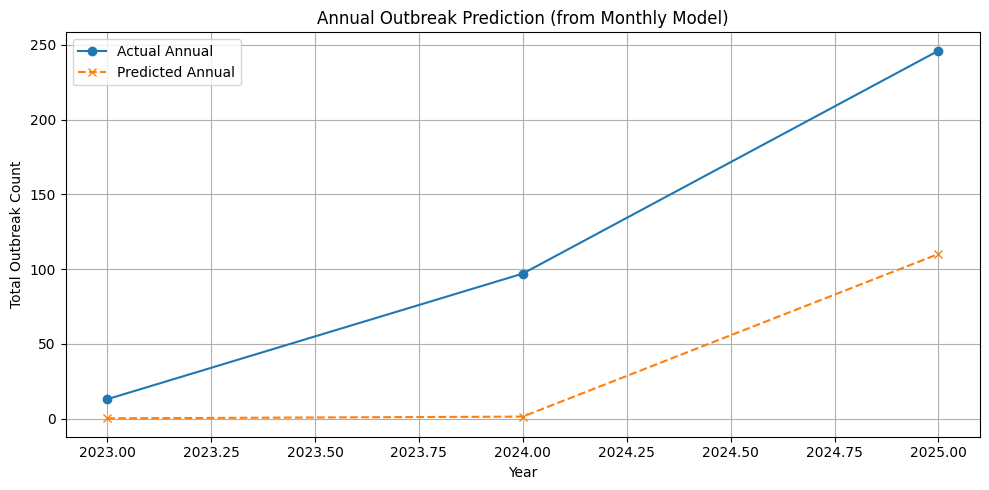


=== Annual Monthly Prediction Results ===
   year  actual   predicted
0  2023    13.0    0.223848
1  2024    97.0    1.389333
2  2025   246.0  110.103775


In [19]:
def plot_annual_from_monthly(end_dates, y_true, y_pred, scaler, title="Annual Prediction from Monthly Model"):
    """
    Aggregate monthly actual & predicted outbreak counts into annual totals.
    """
    # Inverse transform
    y_true_inv = scaler.inverse_transform(y_true.reshape(-1, 1)).ravel()
    y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()

    # Build dataframe
    df = pd.DataFrame({
        "date": pd.to_datetime(end_dates),
        "actual": y_true_inv,
        "predicted": y_pred_inv
    })
    df["year"] = df["date"].dt.year

    # Aggregate by year
    df_yearly = df.groupby("year")[["actual", "predicted"]].sum().reset_index()

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(df_yearly["year"], df_yearly["actual"], marker="o", label="Actual Annual")
    plt.plot(df_yearly["year"], df_yearly["predicted"], marker="x", linestyle="--", label="Predicted Annual")
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Total Outbreak Count")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return df_yearly

# Predict monthly
y_monthly_pred = monthly_model.predict(X_monthly_test, verbose=0).flatten()

# Annual aggregation & plot
annual_monthly_results = plot_annual_from_monthly(
    end_dates=end_dates_monthly_test,
    y_true=y_monthly_test,
    y_pred=y_monthly_pred,
    scaler=scaler_monthly,
    title="Annual Outbreak Prediction (from Monthly Model)"
)

print("\n=== Annual Monthly Prediction Results ===")
print(annual_monthly_results)


In [20]:
import pandas as pd

# ============================================================
# Weekly Results Table
# ============================================================
y_weekly_pred = weekly_model.predict(X_weekly_test, verbose=0)
y_weekly_pred_inv = scaler_weekly.inverse_transform(y_weekly_pred.reshape(-1, 1)).ravel()
y_weekly_test_inv = scaler_weekly.inverse_transform(y_weekly_test.reshape(-1, 1)).ravel()

weekly_results = pd.DataFrame({
    "Date": pd.to_datetime(end_dates_weekly_test),
    "Actual": y_weekly_test_inv,
    "Predicted": y_weekly_pred_inv
}).reset_index(drop=True)

print("\n=== Weekly Results (first 20 rows) ===")
print(weekly_results)


# ============================================================
# Monthly Results Table
# ============================================================
y_monthly_pred = monthly_model.predict(X_monthly_test, verbose=0)
y_monthly_pred_inv = scaler_monthly.inverse_transform(y_monthly_pred.reshape(-1, 1)).ravel()
y_monthly_test_inv = scaler_monthly.inverse_transform(y_monthly_test.reshape(-1, 1)).ravel()

monthly_results = pd.DataFrame({
    "Date": pd.to_datetime(end_dates_monthly_test),
    "Actual": y_monthly_test_inv,
    "Predicted": y_monthly_pred_inv
}).reset_index(drop=True)

print("\n=== Monthly Results (first 20 rows) ===")
print(monthly_results)



=== Weekly Results (first 20 rows) ===
           Date  Actual  Predicted
0    2023-10-22     0.0   0.015603
1    2023-10-22     0.0   0.015603
2    2023-10-22     0.0   0.015603
3    2023-10-22     0.0   0.015603
4    2023-10-22     0.0   0.015603
...         ...     ...        ...
4503 2025-08-03     0.0   0.015603
4504 2025-08-03     0.0   0.015603
4505 2025-08-03     0.0   0.015603
4506 2025-08-03     0.0   0.015603
4507 2025-08-03     0.0   0.015603

[4508 rows x 3 columns]

=== Monthly Results (first 20 rows) ===
           Date  Actual  Predicted
0    2023-11-30     0.0   0.002082
1    2023-11-30     0.0   0.002082
2    2023-11-30     0.0   0.002082
3    2023-11-30     0.0   0.002082
4    2023-11-30     0.0   0.002082
...         ...     ...        ...
1003 2025-07-31     0.0   0.002082
1004 2025-07-31     0.0   0.002082
1005 2025-07-31     0.0   0.002082
1006 2025-07-31     0.0   0.002082
1007 2025-07-31     0.0   0.002082

[1008 rows x 3 columns]


# Save Model

In [21]:
import os

# Create a directory to save the global models
global_models_save_dir = "global_lstm_models"
os.makedirs(global_models_save_dir, exist_ok=True)

# Save the weekly model
weekly_model_save_path = os.path.join(global_models_save_dir, "global_weekly_model.keras")
weekly_model.save(weekly_model_save_path)
print(f"Weekly model saved to: {weekly_model_save_path}")

# Save the monthly model
monthly_model_save_path = os.path.join(global_models_save_dir, "global_monthly_model.keras")
monthly_model.save(monthly_model_save_path)
print(f"Monthly model saved to: {monthly_model_save_path}")


Weekly model saved to: global_lstm_models/global_weekly_model.keras
Monthly model saved to: global_lstm_models/global_monthly_model.keras
